**Modelación del aprendizaje con inteligencia artificial**

Tutorial para el aprendizaje y evaluación de Árboles de Decisión y Bosques Aleatorios

In [1]:
# importar la biblioteca para manipulación y tratamiento de datos
import pandas as pd
import numpy as np
import random

In [2]:
# cargar y mostrar el conjunto de datos sobre cáncer de mama
data = pd.read_csv(r'C:\Users\Raul\OneDrive\Escritorio\CS\TC2034.101\data\salary.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# obtener la información condensada de los predictores
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
for column in data.select_dtypes('object'):
  print("---------------")
  print(column)
  print(data[column].value_counts())

---------------
workclass
workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
---------------
education
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64
---------------
marital-status
marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse         

In [5]:
for column in data:
  print(column, ":", data[column].isna().sum())
  if data[column].dtype == 'object':
    data[column] = data[column].str.strip()

data.columns = data.columns.str.strip()
# Genial

data.head()

age : 0
workclass : 0
fnlwgt : 0
education : 0
education-num : 0
marital-status : 0
occupation : 0
relationship : 0
race : 0
sex : 0
capital-gain : 0
capital-loss : 0
hours-per-week : 0
native-country : 0
salary : 0


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# scaler = MinMaxScaler((0,1))
# scaler = StandardScaler()
# # scaler = RobustScaler()

# temp = data.select_dtypes(exclude= 'object')

# scaler.fit(temp)

# temp = pd.DataFrame(scaler.transform(temp), columns = temp.columns)

# data = pd.concat([data.select_dtypes('object'), temp], axis = 1)

data.drop('native-country', axis=1, inplace= True)

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K


In [7]:
temp = pd.get_dummies(data)
print(temp.columns)
temp = temp.rename(columns= {'sex_Male':'sex', 'salary_>50K':'salary'})
temp.drop(['sex_Female', 'salary_<=50K'], axis=1, inplace=True)

print(temp.columns)
temp.head()

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_10th',
       'education_11th', 'education_12th', 'education_1st-4th',
       'education_5th-6th', 'education_7th-8th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed', 'occupation_?',
       'occupation_

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex,salary
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,38,215646,9,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
3,53,234721,7,0,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,28,338409,13,0,0,40,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False


In [8]:
# crear los conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X = temp.drop('salary', axis=1)
y = temp['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
y_train.sum()

6258

In [10]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_train, y_train = rus.fit_resample(X_train, y_train)

print(y_train.value_counts())

salary
False    6258
True     6258
Name: count, dtype: int64


In [11]:
X_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex
22460,48,278039,9,0,0,60,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3658,21,342575,10,0,0,30,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
8274,56,172071,9,0,0,40,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
12932,60,83850,9,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
6006,33,93206,3,0,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [12]:
# Hyperparams
depth = 4

In [13]:
# crear y entrenar un árbol de decisión para clasificación de cáncer
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=depth, )
dtc = dtc.fit(X_train, y_train)

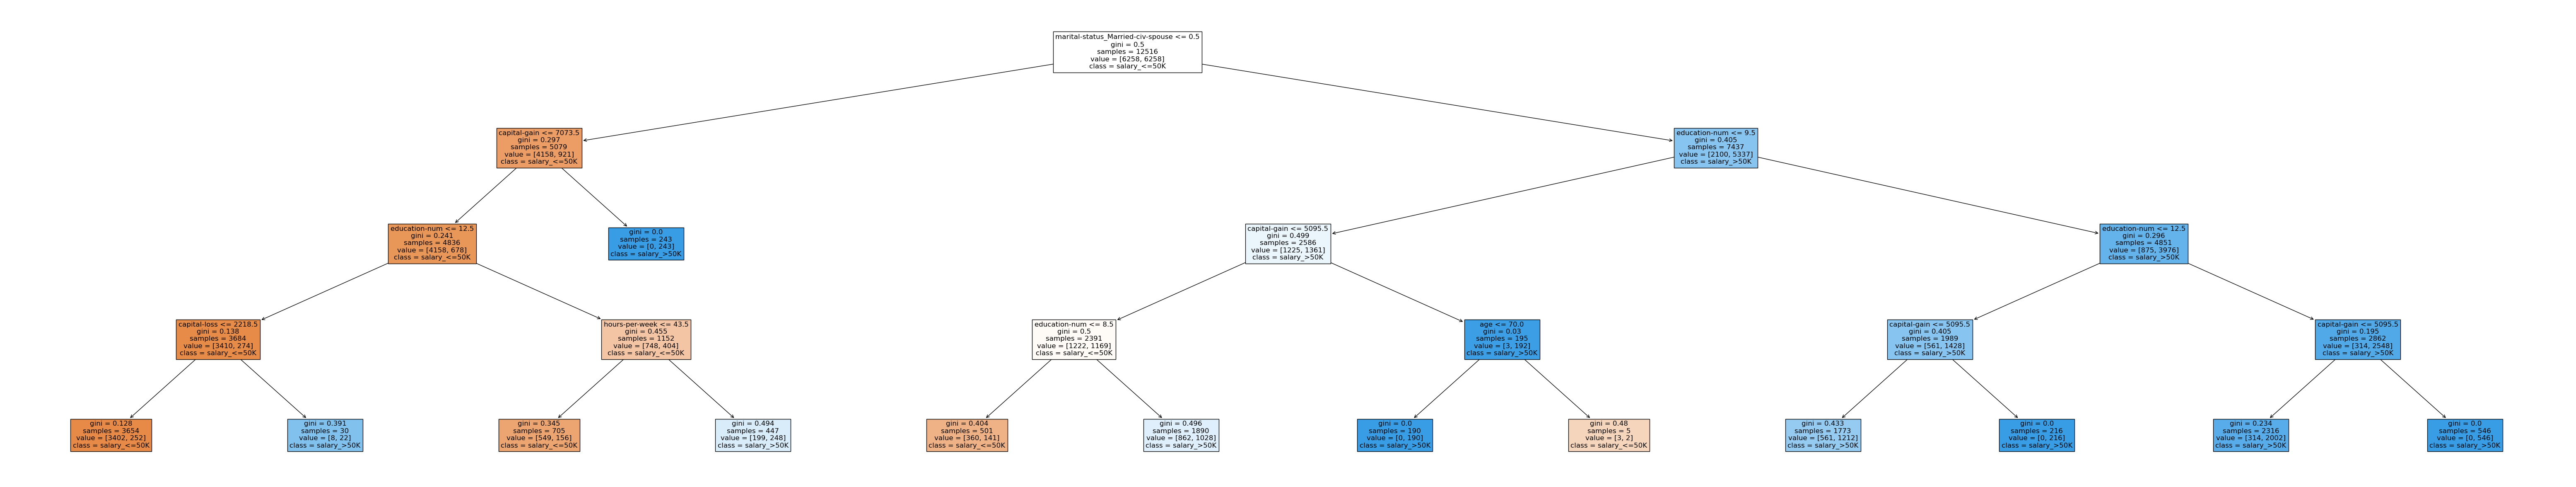

In [14]:
# crea un gráfico que muestre el árbol de decisión
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(80,15))
_ = tree.plot_tree(dtc,
                   feature_names=list(X_train.columns),
                   class_names=['salary_<=50K', 'salary_>50K'],
                   filled=True,
                   fontsize=12)

In [15]:
# crear y entrenar un bosque aleatorio
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200, max_depth=depth)
rfc = rfc.fit(X_train, y_train)

In [16]:
# lista los hiperparámetros del árbol de decisión
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [17]:
# lista los hiperparámetros del bosque aleatorio
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [18]:
# evalua el aprendizaje de los datos de entrenamiento
dtc.score(X_train, y_train)

0.8006551613934164

In [19]:
# evalua el aprendizaje de los datos de entrenamiento
rfc.score(X_train, y_train)

0.7897091722595079

In [20]:
# evalua el aprendizaje de los datos de prueba
dtc.score(X_test, y_test)

0.7417472746814064

In [21]:
# evalua el aprendizaje de los datos de prueba
rfc.score(X_test, y_test)

0.7448180561953017

In [22]:
# obtén las predicciones para el conjunto de prueba
dtc_pred = dtc.predict(X_test)
dtc_pred

array([ True, False, False, ..., False,  True, False])

In [23]:
# obtén las predicciones para el conjunto de prueba
rfc_pred = rfc.predict(X_test)
rfc_pred

array([ True, False, False, ..., False,  True, False])

In [24]:
# cantidad de predicciones distintas
abs(dtc_pred*1 - rfc_pred*1).sum()

698

In [25]:
# muestra la diferencia entre un árbol que no tiene criterios de paro y uno que si los tiene
dtc.predict_proba(X_test)[:10,:]

array([[0.31641286, 0.68358714],
       [0.93103448, 0.06896552],
       [0.93103448, 0.06896552],
       [0.93103448, 0.06896552],
       [0.13557858, 0.86442142],
       [0.13557858, 0.86442142],
       [0.45608466, 0.54391534],
       [0.13557858, 0.86442142],
       [0.93103448, 0.06896552],
       [0.93103448, 0.06896552]])

In [26]:
# muestra la diferencia entre un árbol que no tiene criterios de paro y uno que si los tiene
rfc.predict_proba(X_test)[:10,:]

array([[0.34745878, 0.65254122],
       [0.8673643 , 0.1326357 ],
       [0.8087407 , 0.1912593 ],
       [0.92640375, 0.07359625],
       [0.32373128, 0.67626872],
       [0.22489224, 0.77510776],
       [0.38180455, 0.61819545],
       [0.22640813, 0.77359187],
       [0.76950062, 0.23049938],
       [0.92046582, 0.07953418]])

In [27]:
# evalua y muestra las métricas de evaluación para el árbol
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Exactitud:', accuracy_score(y_test, dtc_pred))
print('Precisión:', precision_score(y_test, dtc_pred))
print('Sensibilidad:', recall_score(y_test, dtc_pred))
print('F1 score:', f1_score(y_test, dtc_pred))

Exactitud: 0.7417472746814064
Precisión: 0.4834503510531595
Sensibilidad: 0.9134554643082754
F1 score: 0.6322693484914735


In [28]:
# Obten y muestra la matriz de confusión para el árbol
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, dtc_pred)
print(cm)

[[3385 1545]
 [ 137 1446]]


In [29]:
# calcula las métricas de evaluación para el árbol con las fórmulas
VN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
VP = cm[1,1]

Exactitud = (VP + VN) / (VP + VN + FP + FN)
Precision = VP / (VP + FP)
Recall = VP / (VP + FN)
F1 = 2*VP / (2*VP + FP + FN )

print('Exactitud: ', Exactitud )
print('Precisión: ', Precision)
print('Sensibilidad: ', Recall)
print('F1-score: ', F1)

Exactitud:  0.7417472746814064
Precisión:  0.4834503510531595
Sensibilidad:  0.9134554643082754
F1-score:  0.6322693484914735


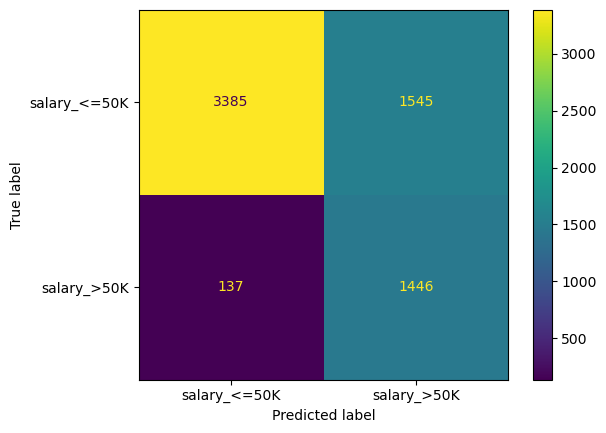

In [30]:
# calcula y muestra una gráfica de la matriz de confusión para el árbol
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_predictions(y_test, dtc_pred, display_labels=['salary_<=50K', 'salary_>50K'])

In [31]:
# obten el reporte de clasificación completo para el árbol
from sklearn.metrics import classification_report

print(classification_report(y_test, dtc_pred, target_names=['salary_<=50K', 'salary_>50K']))

              precision    recall  f1-score   support

salary_<=50K       0.96      0.69      0.80      4930
 salary_>50K       0.48      0.91      0.63      1583

    accuracy                           0.74      6513
   macro avg       0.72      0.80      0.72      6513
weighted avg       0.85      0.74      0.76      6513



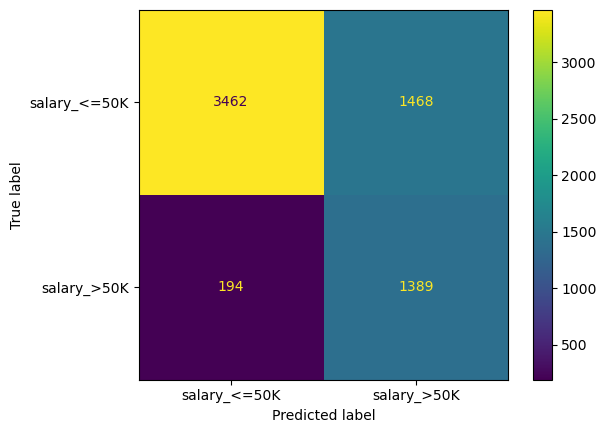

In [32]:
# calcula y muestra una gráfica de la matriz de confusión para el bosque

_ = ConfusionMatrixDisplay.from_predictions(y_test, rfc_pred, display_labels=['salary_<=50K', 'salary_>50K'])

In [33]:
# obten el reporte de clasificación completo para el bosque

print(classification_report(y_test, rfc_pred, target_names=['salary_<=50K', 'salary_>50K']))

              precision    recall  f1-score   support

salary_<=50K       0.95      0.70      0.81      4930
 salary_>50K       0.49      0.88      0.63      1583

    accuracy                           0.74      6513
   macro avg       0.72      0.79      0.72      6513
weighted avg       0.83      0.74      0.76      6513



In [34]:
# crea una lista con el nombre de las características
feature_names = X.columns
feature_names

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_10th',
       'education_11th', 'education_12th', 'education_1st-4th',
       'education_5th-6th', 'education_7th-8th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed', 'occupation_?',
       'occupation_

In [35]:
# obten la importancia de las características para generar las predicciones con el árbol
dtc.feature_importances_

array([0.00122618, 0.        , 0.1917574 , 0.16971268, 0.00918228,
       0.02127579, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.60684567, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [36]:
# ordena las características por su importancia para las prediciones del árbol
dtc_feature_importance = pd.DataFrame(dtc.feature_importances_, index = feature_names).sort_values(0, ascending=False)
dtc_feature_importance.columns = ['Feature Importance']
dtc_feature_importance

,Feature Importance
marital-status_Married-civ-spouse,0.606846
education-num,0.191757
capital-gain,0.169713
hours-per-week,0.021276
capital-loss,0.009182
...,...
education_Preschool,0.000000
education_Prof-school,0.000000
education_Some-college,0.000000
marital-status_Divorced,0.000000


In [37]:
# obtén una lista solo con las características utilizadas
dtc_features = list(dtc_feature_importance[dtc_feature_importance['Feature Importance']>0].index)
dtc_features

['marital-status_Married-civ-spouse',
 'education-num',
 'capital-gain',
 'hours-per-week',
 'capital-loss',
 'age']

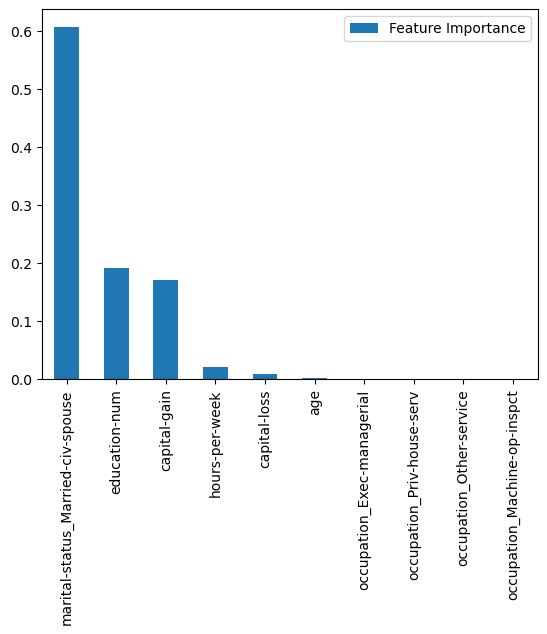

In [38]:
# muestra las características importantes en una gráfica de barras
_ = dtc_feature_importance.head(10).plot(kind='bar')

In [39]:
# Sigue el primer ejemplo del árbol para explicar el camino de decisión para la salida de la función
X_test.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex
10855,48,195949,10,0,0,42,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
17074,17,176467,5,0,0,20,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2400,32,117927,10,0,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1389,17,46496,7,0,0,5,False,False,False,False,...,False,True,False,False,False,False,False,False,True,True
17999,27,137063,13,0,0,50,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
22257,50,172175,15,0,0,50,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
9180,54,329266,9,0,0,44,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
23498,53,58913,14,0,0,42,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
10830,47,152073,9,0,0,40,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2059,20,176321,8,0,0,40,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [40]:
# crea una matriz con las rutas de decisión seguidas para los primeros 10 casos de prueba
sparse = dtc.decision_path(X_test).toarray()[:10]
sparse

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]], dtype=int64)

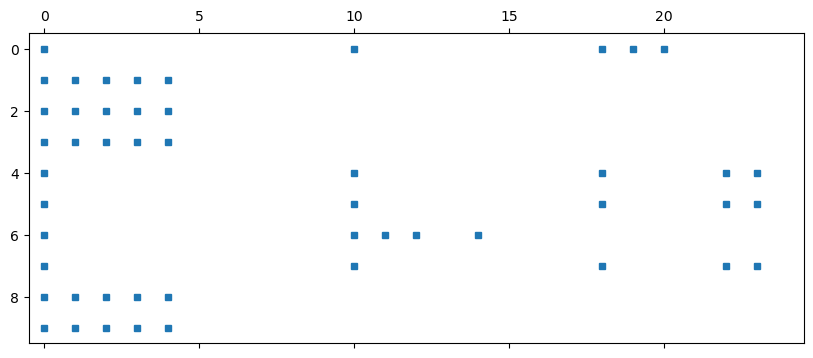

In [41]:
# muestra las rutas de decisión en una figura
plt.figure(figsize=(10, 10))
_ = plt.spy(sparse, markersize=5)

In [42]:
# ordena las características por su importancia para las prediciones del bosque
rfc_feature_importance = pd.DataFrame(rfc.feature_importances_, index = feature_names).sort_values(0, ascending=False)
rfc_feature_importance.columns = ['Feature Importance']
rfc_feature_importance

,Feature Importance
relationship_Husband,0.162250
marital-status_Married-civ-spouse,0.160335
marital-status_Never-married,0.118339
age,0.093449
education-num,0.090029
...,...
education_Preschool,0.000007
race_Other,0.000004
occupation_Armed-Forces,0.000000
education_1st-4th,0.000000


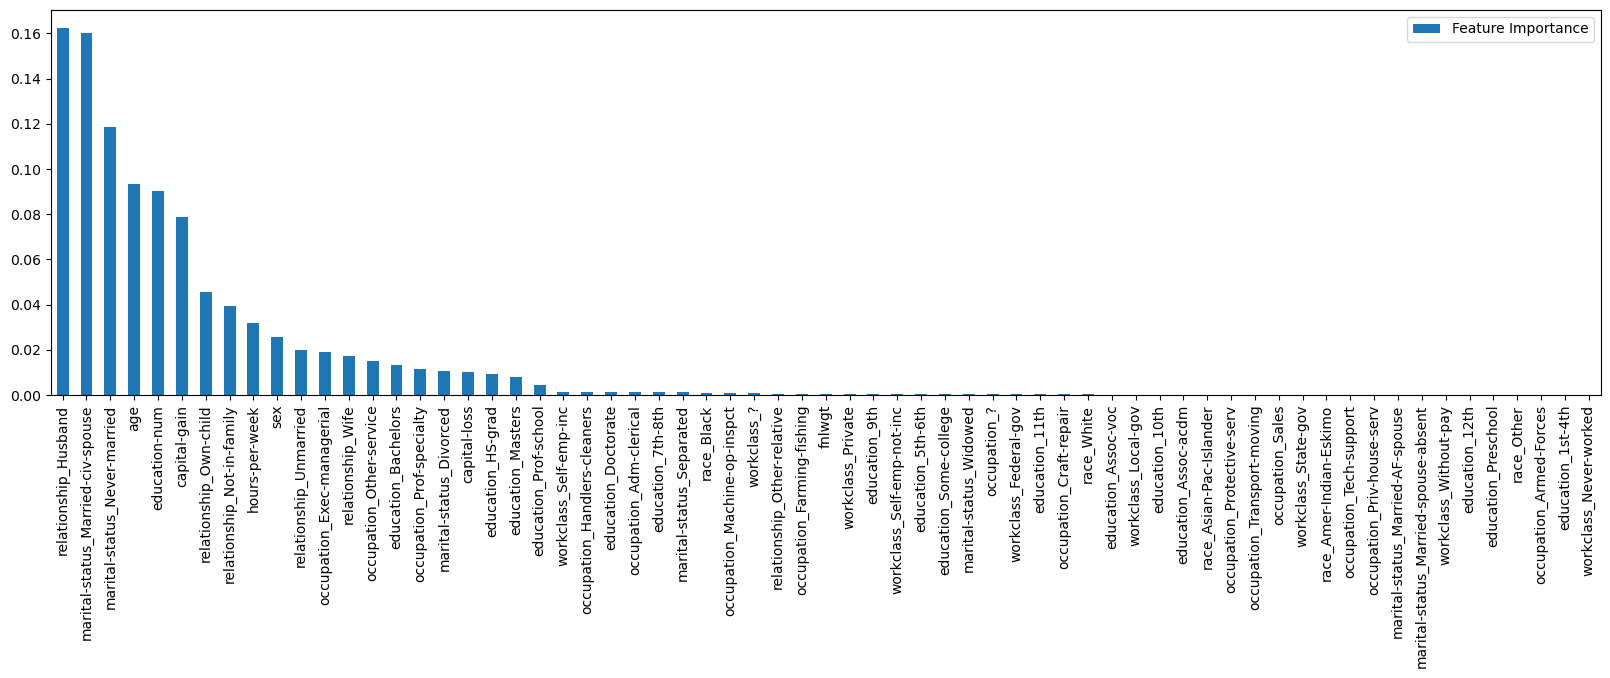

In [43]:
# muestra las características importantes en una gráfica de barras
fig, ax = plt.subplots(figsize=(20, 5))

_ = rfc_feature_importance.head(len(feature_names)).plot(kind='bar', ax=ax)

plt.show()


<Figure size 640x480 with 0 Axes>

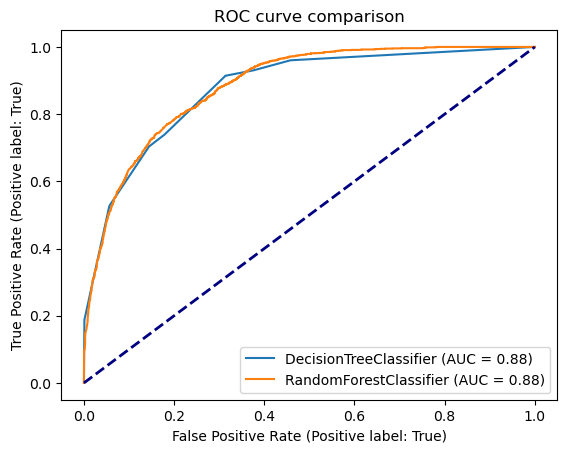

In [44]:
# calcular y mostrar las curvas ROC de cada modelo de aprendizaje
# y sus métricas de área bajo la curva (AUC)
from sklearn.metrics import RocCurveDisplay

plt.figure()
lw = 2
disp = RocCurveDisplay.from_estimator(dtc, X_test, y_test)
RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=disp.ax_)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.title("ROC curve comparison")
plt.legend(loc="lower right")
plt.show()

**Conclusión**: Para esta actividad, nosotros elegimos una base de datos que hacía la clasificación binaria de diferentes empleados alrededor del mundo, considerando variables como la educasión, ocupasión, estado marital, edad, entre otros. Nosotros elegimos que para este trabajo nuestra variable a predecir sea el salario en donde se dividían en 2, salarios mayores a 50000 y salarios menores a 50000, que aunque no son la misma cantidad de numeros, se tuvo que hacer una limpieza y ajuste para que se pudiera llevar a cabo de la mejor manera. Tras llevar a cabo un análisis comparativo entre el árbol de decisión y el bosque aleatorio mediante representación gráfica utilizando una curva ROC, se ha observado que ambos modelos presentan curvas muy similares. Además, se logra observar que en las cifras presentadas, no se muestran diferencias significativas en el área bajo la curva, lo que indica que en este contexto específico ambos modelos son igualmente apropiados para tomar una decisión y sus diagnósticos tienen una precisión prácticamente idéntica. Este nos resulta muy interesante, ya que, a pesar de compartir la misma variable predictora principal, los modelos asignan niveles de importancia ligeramente diferentes a esta misma variable. Además, se destaca que, incluso cuando hay una ligera variación en las demás variables, la similitud en la eficacia de ambos modelos persiste. Esta característica de que haya una consistencia en la capacidad que los dos modelos tienen para predecir un resultado nos sirve como indicador de confiabilidad de los modelos, ya que se obtienen resultados similares mediante diferentes enfoques. Gracias a todo este proceso, pudimos darnos cuenta de que la elección entre un árbol de decisión y un bosque aleatorio en este escenario puede depender de otros factores, como la interpretabilidad del modelo o los recursos computacionales disponibles, ya que en términos de rendimiento predictivo no parece haber una ventaja clara de uno sobre el otro.



Raúl Correa Ocañas

Predictor: marital-status

In [45]:
indices = random.sample(range(len(data)), 15)
print(data.iloc[indices][['salary']].value_counts())
print("----------------")
print(data.iloc[indices][['marital-status','salary']].value_counts())

salary
<=50K     14
>50K       1
Name: count, dtype: int64
----------------
marital-status      salary
Never-married       <=50K     7
Married-civ-spouse  <=50K     5
Divorced            <=50K     2
Married-civ-spouse  >50K      1
Name: count, dtype: int64


In [46]:
def entropy(numlist):
    entropy = 0
    total = sum(numlist)
    for number in numlist:
        if number == 0:
            entropy += 0
        else:
            entropy += -number/total * np.log2(number/total)
    
    return entropy

In [63]:
def gini(numlist):
    gini = 0
    total = sum(numlist)
    for number in numlist:
        gini += (number/total)**2

    return 1-gini

In [64]:
entropy_metric = entropy([14,1])

entropy_metric

0.35335933502142136

In [65]:
ig_metric = entropy_metric - (6/15 * entropy([5,1]) + 7/15 * entropy([7,0]) + 2/15 * entropy([2,0]))

ig_metric

0.09335036636207972

In [66]:
weighted_gini = 6/15 * gini([5,1]) + 7/15 * gini([7,0]) + 2/15 * gini([2,0])
weighted_gini

0.11111111111111108